In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('kmeans - kmeans_blobs.csv')
X = data.to_numpy()  

# Normalize the dataset
X = (X - X.mean(axis=0)) / X.std(axis=0)


In [16]:
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def compute_clusters(X, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for x in X:
        distances = [np.linalg.norm(x - c) for c in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(x)
    return [np.array(cluster) for cluster in clusters]

def update_centroids(clusters):
    return np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else np.zeros_like(cluster[0]) for cluster in clusters])



In [18]:
def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = compute_clusters(X, centroids)
        new_centroids = update_centroids(clusters)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return clusters, centroids



In [22]:
def plot_clusters(X, clusters, centroids, k):
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    for i, cluster in enumerate(clusters):
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
    plt.title(f'K-Means Clustering (k={k})')
    plt.legend()
    plt.show()



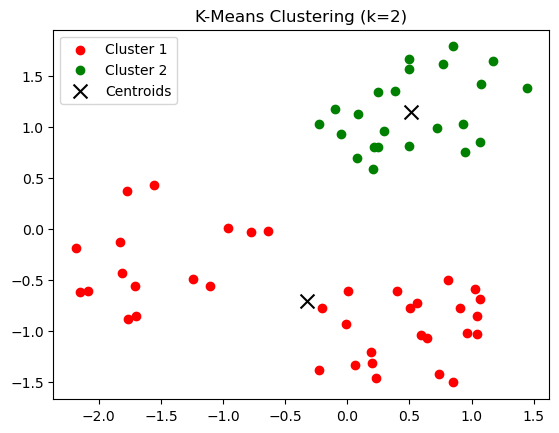

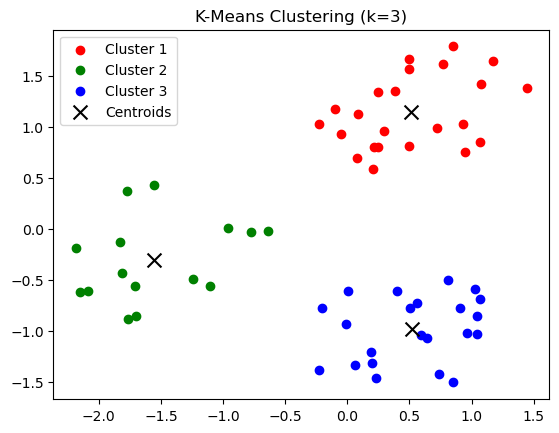

In [24]:

for k in [2, 3]:
    clusters, centroids = k_means(X, k)
    plot_clusters(X, clusters, centroids, k)